## 1. Importation des bibliothèques nécessaires

On commence par importer les bibliothèques essentielles :
- **pandas** : manipulation des données
- **numpy** : calculs numériques
- **matplotlib & seaborn** : visualisations

In [16]:
# =============================================================================
# IMPORT REQUIRED LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


## 2. Chargement des données

On charge le dataset `original_cleaned_nyc_taxi_data_2018.csv` depuis le dossier `datasets/`.

In [17]:
# =============================================================================
# DATA LOADING
# =============================================================================
df = pd.read_csv('datasets/original_cleaned_nyc_taxi_data_2018.csv')

print(f"Dataset loaded successfully")
print(f"Dimensions: {df.shape[0]:,} rows x {df.shape[1]} columns")

Dataset loaded successfully
Dimensions: 8,319,928 rows x 21 columns


## 3. Exploration initiale des données

### 3.1 Aperçu des premières lignes
Visualisons les premières lignes pour comprendre la structure des données.

In [18]:
# Aperçu des 5 premières lignes
df.head()

,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,3,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,...,61.67,231,138,2018,3,29,3,13,3317.0,61.67
1,4,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,...,62.47,87,138,2018,3,29,3,14,3648.0,62.47
2,5,11.60,1,N,1,42.0,0.0,0.5,14.57,5.76,...,63.13,68,138,2018,3,29,3,14,3540.0,63.13
3,10,5.10,1,N,1,26.5,1.0,0.5,5.65,0.00,...,33.95,186,33,2018,3,29,3,16,2585.0,33.95
4,12,11.11,1,N,1,45.5,1.0,0.5,10.61,5.76,...,63.67,163,138,2018,3,29,3,16,4521.0,63.67


### 3.2 Informations sur les colonnes
Examinons les types de données et les informations générales sur chaque colonne.

In [19]:
# =============================================================================
# DATASET INFORMATION
# =============================================================================
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319928 entries, 0 to 8319927
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   trip_distance            float64
 2   rate_code                int64  
 3   store_and_fwd_flag       object 
 4   payment_type             int64  
 5   fare_amount              float64
 6   extra                    float64
 7   mta_tax                  float64
 8   tip_amount               float64
 9   tolls_amount             float64
 10  imp_surcharge            float64
 11  total_amount             float64
 12  pickup_location_id       int64  
 13  dropoff_location_id      int64  
 14  year                     int64  
 15  month                    int64  
 16  day                      int64  
 17  day_of_week              int64  
 18  hour_of_day              int64  
 19  trip_duration            float64
 20  calculated_total_amount  

### 3.3 Liste des colonnes
Affichons la liste complète des colonnes disponibles.

In [20]:
# =============================================================================
# COLUMN LIST
# =============================================================================
print("Dataset Columns:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col} ({df[col].dtype})")

Dataset Columns:
1. Unnamed: 0 (int64)
2. trip_distance (float64)
3. rate_code (int64)
4. store_and_fwd_flag (object)
5. payment_type (int64)
6. fare_amount (float64)
7. extra (float64)
8. mta_tax (float64)
9. tip_amount (float64)
10. tolls_amount (float64)
11. imp_surcharge (float64)
12. total_amount (float64)
13. pickup_location_id (int64)
14. dropoff_location_id (int64)
15. year (int64)
16. month (int64)
17. day (int64)
18. day_of_week (int64)
19. hour_of_day (int64)
20. trip_duration (float64)
21. calculated_total_amount (float64)


## 4. Analyse des valeurs manquantes

Vérifions s'il y a des valeurs manquantes dans notre dataset.

In [21]:
# =============================================================================
# MISSING VALUES ANALYSIS
# =============================================================================
print("Missing Values by Column:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2)
})

print(missing_df[missing_df['Missing Values'] > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum():,}")

Missing Values by Column:
                         Missing Values  Percentage (%)
calculated_total_amount          663659            7.98

Total missing values: 663,659


## 5. Statistiques descriptives

Analysons les statistiques de base pour les variables numériques.

In [22]:
# =============================================================================
# DESCRIPTIVE STATISTICS
# =============================================================================
print("Descriptive Statistics:")
print("=" * 50)
df.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8319928.0,4.467142e+06,2.624607e+06,3.00,2183044.50,4437276.50,6723023.25,9099450.00
trip_distance,8319928.0,9.126197e+00,5.882454e+00,0.01,6.04,8.60,11.22,7655.76
rate_code,8319928.0,1.154465e+00,6.336518e-01,1.00,1.00,1.00,1.00,99.00
payment_type,8319928.0,1.180637e+00,4.070677e-01,1.00,1.00,1.00,1.00,4.00
fare_amount,8319928.0,3.179930e+01,7.569058e+01,0.01,23.50,29.00,37.00,187436.46
extra,8319928.0,3.470177e-01,5.661773e-01,-80.00,0.00,0.00,0.50,20.20
mta_tax,8319928.0,4.882021e-01,8.273953e-02,0.00,0.50,0.50,0.50,80.80
tip_amount,8319928.0,5.530872e+00,4.570091e+00,0.00,2.00,5.55,7.91,422.00
tolls_amount,8319928.0,2.178233e+00,3.751506e+00,-5.76,0.00,0.00,5.76,918.25
imp_surcharge,8319928.0,2.999538e-01,3.743958e-03,0.00,0.30,0.30,0.30,0.60


## 6. Analyse des variables catégorielles

Examinons les valeurs uniques pour chaque variable catégorielle.

In [23]:
# =============================================================================
# CATEGORICAL VARIABLES ANALYSIS
# =============================================================================
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print("Categorical Variables and Unique Values:")
    print("=" * 50)
    for col in categorical_cols:
        print(f"\n- {col} ({df[col].nunique()} unique values):")
        print(df[col].value_counts().head(10))
else:
    print("No categorical variables of type 'object' found.")
    print("\nChecking columns with few unique values:")
    for col in df.columns:
        if df[col].nunique() < 20:
            print(f"\n- {col} ({df[col].nunique()} unique values):")
            print(df[col].value_counts())

Categorical Variables and Unique Values:

- store_and_fwd_flag (2 unique values):
store_and_fwd_flag
N    8279475
Y      40453
Name: count, dtype: int64


## 7. Visualisations

### 7.1 Distribution des variables numériques
Visualisons la distribution des principales variables numériques.

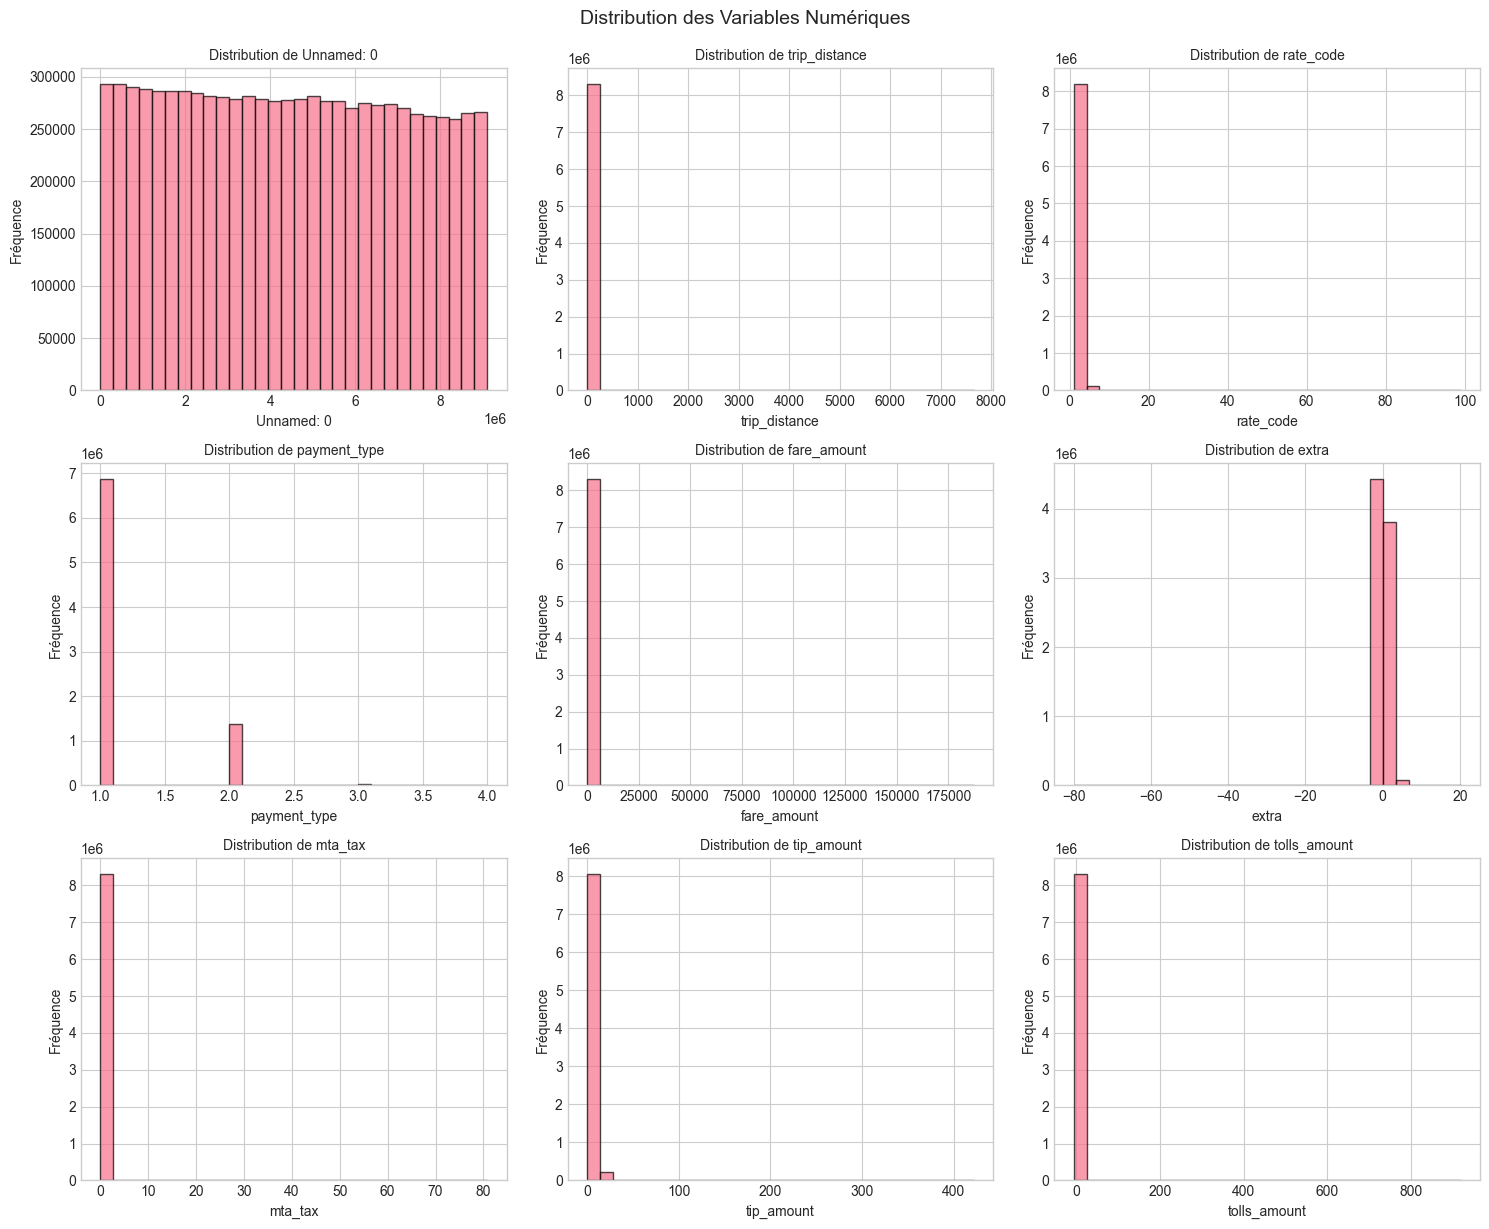

In [24]:
# Distribution des variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Sélectionner les colonnes les plus importantes (max 9)
cols_to_plot = numeric_cols[:9]
n_cols = len(cols_to_plot)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Masquer les axes vides
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution des Variables Numériques', fontsize=14, y=1.02)
plt.show()

### 7.2 Boxplots pour détecter les outliers
Les boxplots nous aident à identifier les valeurs aberrantes.

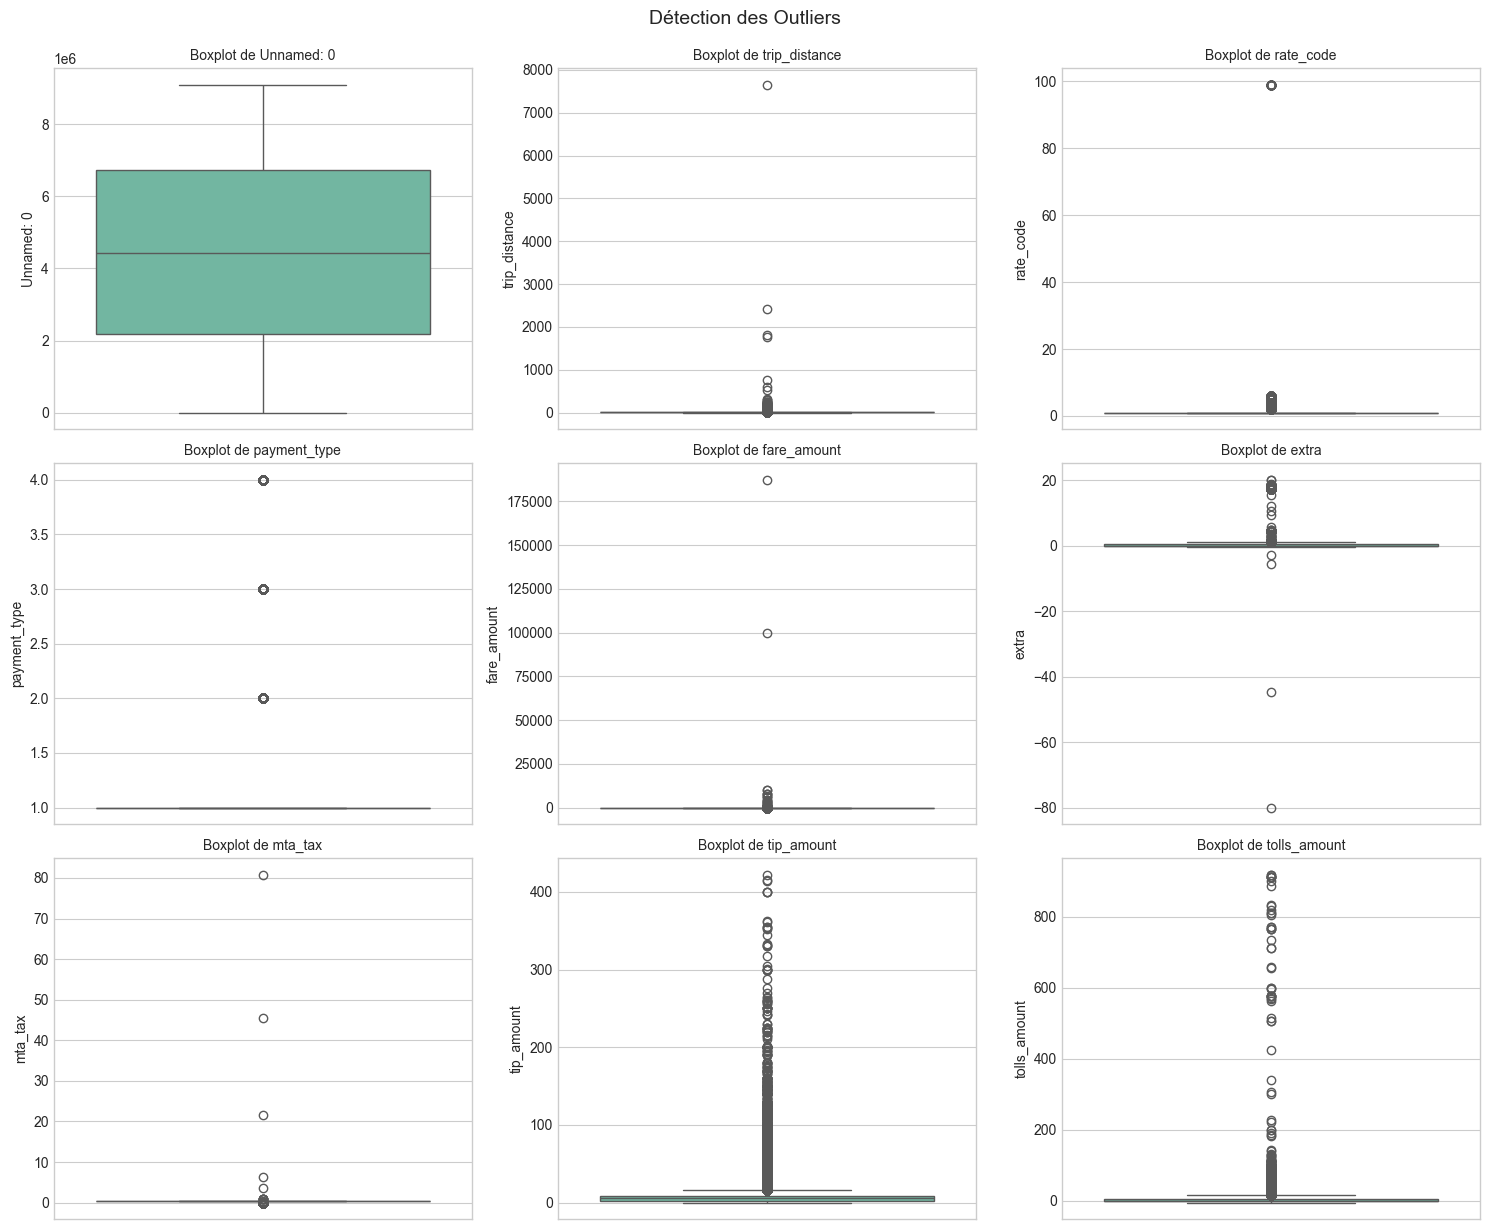

In [25]:
# Boxplots pour détecter les outliers
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=df, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot de {col}', fontsize=10)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Détection des Outliers', fontsize=14, y=1.02)
plt.show()

## 8. Matrice de corrélation

La matrice de corrélation nous permet d'identifier les relations entre les variables numériques.

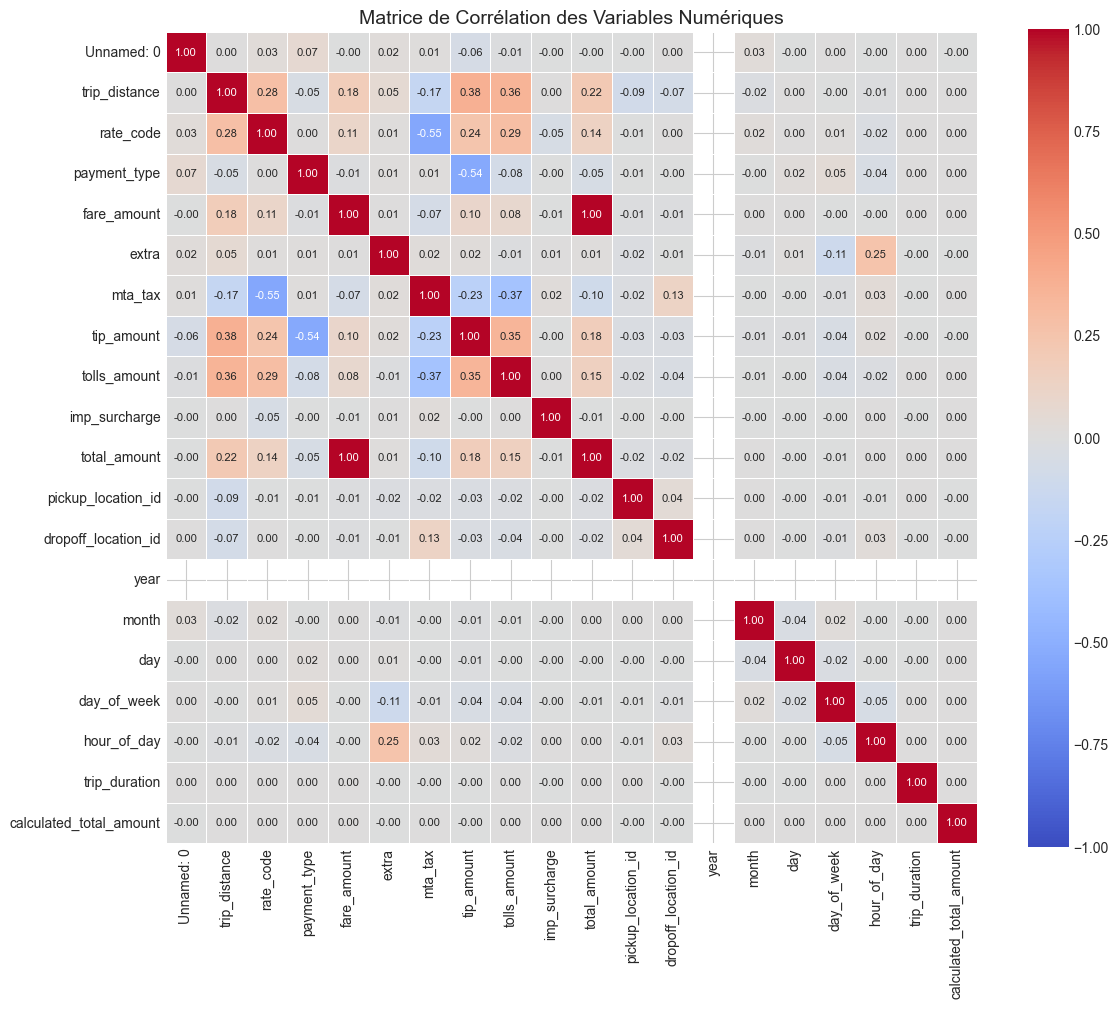

In [26]:
# Matrice de corrélation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True, vmin=-1, vmax=1,
            annot_kws={"size": 8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14)
plt.tight_layout()
plt.show()

### 8.1 Identifier les fortes corrélations
Trouvons les paires de variables avec des corrélations significatives.

In [27]:
# =============================================================================
# STRONG CORRELATIONS IDENTIFICATION
# =============================================================================
print("Strong Correlations (|r| > 0.5):")
print("=" * 50)

# Extract correlation pairs
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlation': corr
            })

if corr_pairs:
    corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False)
    print(corr_df.to_string(index=False))
else:
    print("No strong correlations found (|r| > 0.5)")

Strong Correlations (|r| > 0.5):
  Variable 1   Variable 2  Correlation
 fare_amount total_amount     0.996061
payment_type   tip_amount    -0.536941
   rate_code      mta_tax    -0.552875


## 9. Analyse spécifique pour ML

### 9.1 Variables cibles potentielles
Analysons les variables qui pourraient être intéressantes à prédire.

In [28]:
# =============================================================================
# POTENTIAL TARGET VARIABLES ANALYSIS
# =============================================================================
print("POTENTIAL TARGET VARIABLES ANALYSIS")
print("=" * 60)

# Check common columns in taxi datasets
potential_targets = ['fare_amount', 'total_amount', 'tip_amount', 'trip_duration', 
                     'trip_distance', 'fare', 'tip', 'total', 'duration', 'distance']

found_targets = [col for col in df.columns if any(t in col.lower() for t in potential_targets)]

if found_targets:
    print("\nPotential target variables found:")
    for col in found_targets:
        print(f"\n- {col}:")
        print(f"   - Mean: {df[col].mean():.2f}")
        print(f"   - Median: {df[col].median():.2f}")
        print(f"   - Min: {df[col].min():.2f}")
        print(f"   - Max: {df[col].max():.2f}")
        print(f"   - Std Dev: {df[col].std():.2f}")
else:
    print("\nAvailable columns:")
    for col in numeric_cols:
        print(f"  - {col}")

POTENTIAL TARGET VARIABLES ANALYSIS

Potential target variables found:

- trip_distance:
   - Mean: 9.13
   - Median: 8.60
   - Min: 0.01
   - Max: 7655.76
   - Std Dev: 5.88

- fare_amount:
   - Mean: 31.80
   - Median: 29.00
   - Min: 0.01
   - Max: 187436.46
   - Std Dev: 75.69

- tip_amount:
   - Mean: 5.53
   - Median: 5.55
   - Min: 0.00
   - Max: 422.00
   - Std Dev: 4.57

- total_amount:
   - Mean: 40.65
   - Median: 37.55
   - Min: 0.31
   - Max: 187437.76
   - Std Dev: 76.77

- trip_duration:
   - Mean: 2210.02
   - Median: 1835.00
   - Min: 1.00
   - Max: 320031.00
   - Std Dev: 4865.90

- calculated_total_amount:
   - Mean: 40.65
   - Median: 37.55
   - Min: 0.31
   - Max: 187437.76
   - Std Dev: 79.81


### 9.2 Corrélations avec les variables cibles
Visualisons les corrélations avec les variables cibles identifiées.


Correlations with trip_distance:
tip_amount: 0.3751 (moderate)
tolls_amount: 0.3555 (moderate)
rate_code: 0.2843 (weak)
total_amount: 0.2172 (weak)
fare_amount: 0.1798 (weak)
extra: 0.0549 (very weak)
Unnamed: 0: 0.0039 (very weak)
imp_surcharge: 0.0036 (very weak)
day: 0.0016 (very weak)
calculated_total_amount: 0.0011 (very weak)
trip_duration: 0.0008 (very weak)
day_of_week: -0.0049 (very weak)
hour_of_day: -0.0126 (very weak)
month: -0.0205 (very weak)
payment_type: -0.0468 (very weak)
dropoff_location_id: -0.0710 (very weak)
pickup_location_id: -0.0880 (very weak)
mta_tax: -0.1714 (weak)
year: nan (very strong)


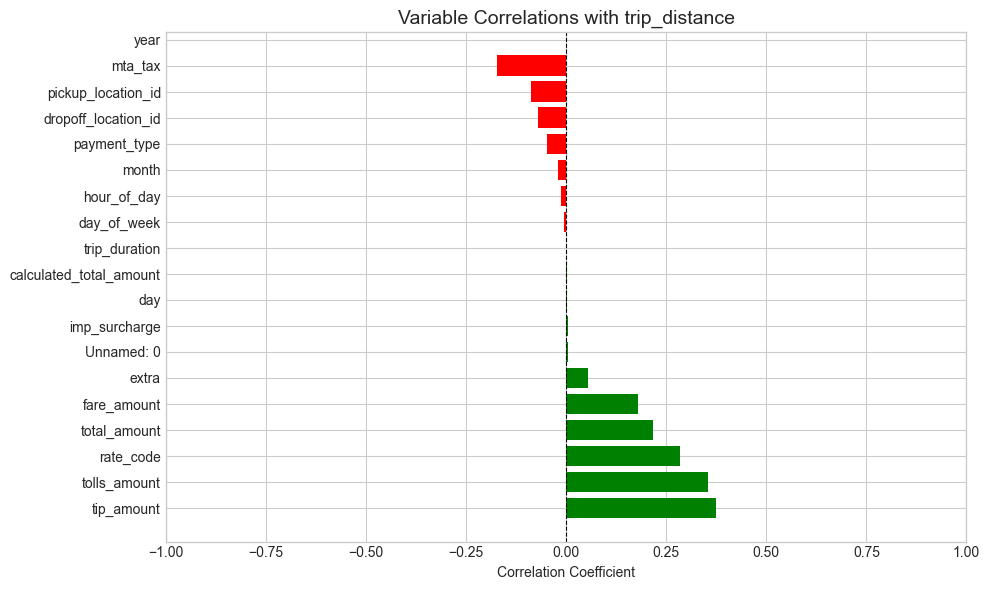


Correlations with fare_amount:
total_amount: 0.9961 (very strong)
trip_distance: 0.1798 (weak)
rate_code: 0.1093 (weak)
tip_amount: 0.1008 (weak)
tolls_amount: 0.0850 (very weak)
extra: 0.0053 (very weak)
month: 0.0020 (very weak)
day: 0.0005 (very weak)
calculated_total_amount: 0.0002 (very weak)
trip_duration: 0.0002 (very weak)
Unnamed: 0: -0.0005 (very weak)
hour_of_day: -0.0021 (very weak)
day_of_week: -0.0024 (very weak)
imp_surcharge: -0.0077 (very weak)
payment_type: -0.0117 (very weak)
dropoff_location_id: -0.0126 (very weak)
pickup_location_id: -0.0140 (very weak)
mta_tax: -0.0699 (very weak)
year: nan (very strong)


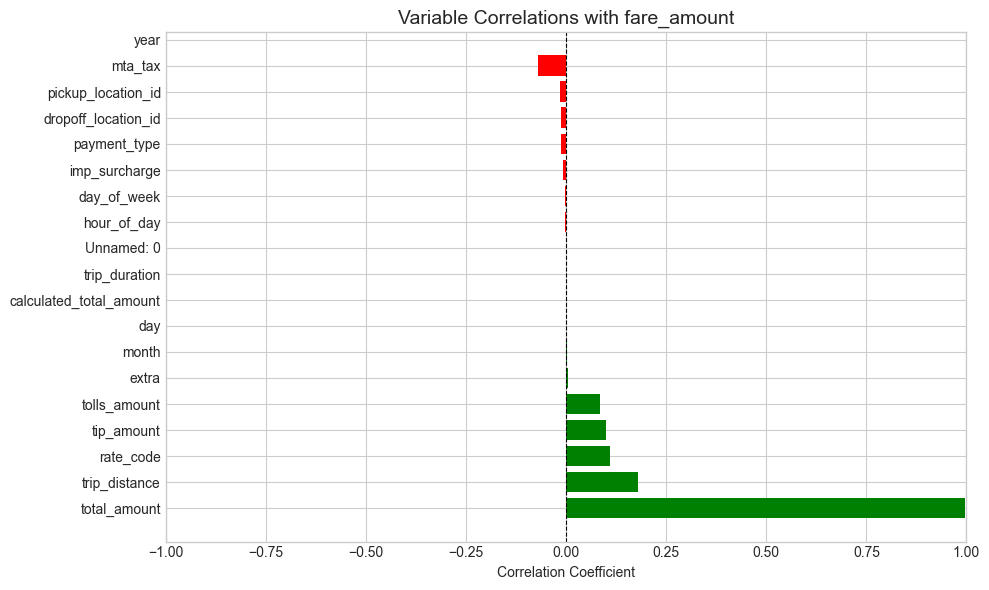

In [29]:
# =============================================================================
# CORRELATIONS WITH TARGET VARIABLES
# =============================================================================
if found_targets:
    for target in found_targets[:2]:  # First 2 targets
        print(f"\nCorrelations with {target}:")
        print("=" * 50)
        
        target_corr = correlation_matrix[target].drop(target).sort_values(ascending=False)
        
        for col, corr in target_corr.items():
            strength = "very weak" if abs(corr) < 0.1 else "weak" if abs(corr) < 0.3 else "moderate" if abs(corr) < 0.5 else "strong" if abs(corr) < 0.7 else "very strong"
            print(f"{col}: {corr:.4f} ({strength})")
        
        # Visualization
        plt.figure(figsize=(10, 6))
        colors = ['green' if x > 0 else 'red' for x in target_corr.values]
        plt.barh(target_corr.index, target_corr.values, color=colors)
        plt.title(f'Variable Correlations with {target}', fontsize=14)
        plt.xlabel('Correlation Coefficient')
        plt.xlim(-1, 1)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
        plt.tight_layout()
        plt.show()

## 10. Résumé et Recommandations ML

Récapitulons les principales découvertes et recommandations.

In [30]:
# =============================================================================
# EXPLORATORY DATA ANALYSIS SUMMARY
# =============================================================================
print("=" * 70)
print("EXPLORATORY DATA ANALYSIS SUMMARY - NYC TAXI 2018")
print("=" * 70)

print(f"\nDATASET DIMENSIONS:")
print(f"   - Number of rows: {df.shape[0]:,}")
print(f"   - Number of columns: {df.shape[1]}")

print(f"\nNUMERIC VARIABLES:")
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"   - {len(num_cols)} variables")

print(f"\nMISSING VALUES:")
print(f"   - Total: {df.isnull().sum().sum():,}")

print(f"\nRECOMMENDED TARGET VARIABLES FOR ML:")
print("")
print("   REGRESSION (predict continuous value):")
if found_targets:
    for t in found_targets:
        print(f"      - {t}")
else:
    print("      - To be defined based on available columns")

print("")
print("   CLASSIFICATION (predict category):")
print("      - Create classes based on amounts (low/medium/high)")
print("      - Predict payment type")
print("      - Predict destination zone")

print("\n" + "=" * 70)
print("NEXT STEPS:")
print("   1. Choose target variable")
print("   2. Feature engineering (create new variables)")
print("   3. Encode categorical variables")
print("   4. Normalize/Standardize features")
print("   5. Split into train/test sets")
print("   6. Train the model")
print("   7. Evaluate performance")
print("=" * 70)

EXPLORATORY DATA ANALYSIS SUMMARY - NYC TAXI 2018

DATASET DIMENSIONS:
   - Number of rows: 8,319,928
   - Number of columns: 21

NUMERIC VARIABLES:
   - 20 variables

MISSING VALUES:
   - Total: 663,659

RECOMMENDED TARGET VARIABLES FOR ML:

   REGRESSION (predict continuous value):
      - trip_distance
      - fare_amount
      - tip_amount
      - total_amount
      - trip_duration
      - calculated_total_amount

   CLASSIFICATION (predict category):
      - Create classes based on amounts (low/medium/high)
      - Predict payment type
      - Predict destination zone

NEXT STEPS:
   1. Choose target variable
   2. Feature engineering (create new variables)
   3. Encode categorical variables
   4. Normalize/Standardize features
   5. Split into train/test sets
   6. Train the model
   7. Evaluate performance
